In [310]:
import pandas as pd

train_bin_results= '/mnt/data/CAMI/DNABERT/rand_train.csv'
val_bin_results = '/mnt/data/CAMI/DNABERT/rand_val.csv'
tnf_train_results = '/mnt/data/CAMI/DNABERT/tnf_rand_train.csv'
tnf_val_results = '/mnt/data/CAMI/DNABERT/tnf_rand_val.csv'

In [311]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

col_names = ['contig_length', 'method', 'randint', 'randintadj']
train_csv = pd.read_csv(train_bin_results, header = None, names=col_names)
train_csv

,contig_length,method,randint,randintadj
0,10000,hdbscan_20_fn_layer12_pca400,0.636129,0.170345
1,5000,hdbscan_20_fn_layer12_pca400,0.612529,0.176103
2,2000,hdbscan_20_fn_layer12_pca500,0.657800,0.247720
3,1000,hdbscan_20_fn_layer12_pca500,0.471612,0.002932
4,500,hdbscan_20_fn_layer12_pca500,0.480059,0.004285
5,0,hdbscan_20_fn_layer12_pca500,0.370651,0.027232


In [312]:
train_rand_values=train_csv['randint']
train_rand_values

0    0.636129
1    0.612529
2    0.657800
3    0.471612
4    0.480059
5    0.370651
Name: randint, dtype: float64

In [313]:
col_names = ['contig_length', 'method', 'randint', 'randintadj']
val_csv = pd.read_csv(val_bin_results, header = None, names=col_names)
val_csv

,contig_length,method,randint,randintadj
0,10000,hdbscan_20_fn_layer12_pca400,0.267950,0.008305
1,5000,hdbscan_20_fn_layer12_pca400,0.412602,-0.000922
2,2000,hdbscan_20_fn_layer12_pca500,0.547972,0.050564
3,1000,hdbscan_20_fn_layer12_pca500,0.591882,0.049133
4,500,hdbscan_20_fn_layer12_pca500,0.253556,0.008748
5,0,hdbscan_20_fn_layer12_pca500,0.407541,-0.003182


In [314]:
val_rand_values=val_csv['randint']
val_rand_values

0    0.267950
1    0.412602
2    0.547972
3    0.591882
4    0.253556
5    0.407541
Name: randint, dtype: float64

In [315]:
col_names = ['contig_length', 'method', 'randint', 'randintadj']
tnf_train_csv = pd.read_csv(tnf_train_results, header = None, names=col_names)
tnf_train_csv

,contig_length,method,randint,randintadj
0,10000,tnf,0.731684,0.0
1,5000,tnf,0.185209,0.0
2,2000,tnf,0.607693,0.0
3,1000,tnf,0.400823,0.0
4,500,tnf,0.388709,0.0
5,0,tnf,0.099875,0.0


In [316]:
tnf_train_values=tnf_train_csv['randint']
tnf_train_values


0    0.731684
1    0.185209
2    0.607693
3    0.400823
4    0.388709
5    0.099875
Name: randint, dtype: float64

In [317]:
col_names = ['contig_length', 'method', 'randint', 'randintadj']
tnf_val_csv = pd.read_csv(tnf_val_results, header = None, names=col_names)
tnf_val_csv

,contig_length,method,randint,randintadj
0,10000,tnf,0.889311,0.0
1,5000,tnf,0.672692,0.0
2,2000,tnf,0.620068,0.0
3,1000,tnf,0.396928,0.0
4,500,tnf,0.160446,0.0
5,0,tnf,0.019409,0.0


In [318]:
tnf_val_values=tnf_val_csv['randint']
tnf_val_values

0    0.889311
1    0.672692
2    0.620068
3    0.396928
4    0.160446
5    0.019409
Name: randint, dtype: float64

In [319]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import numpy as np

#per_data=genfromtxt('result.csv',delimiter=',')


x = [500, 1000, 2000, 5000, 10000]

tnf_t_y = [train]

tnf_v_y = [0.2, 0.1, 0.5, 0.9, 0.6]

train_y = [train_rand_values[5], train_rand_values[4], train_rand_values[3], train_rand_values[2], train_rand_values[1], train_rand_values[0]]

val_y = [val_rand_values[5], val_rand_values[4], val_rand_values[3], val_rand_values[2], val_rand_values[1], val_rand_values[0]]

plt.figure(figsize=(17, 10))

ax = plt.axes()
ax.grid(False)
plt.title("Rand Index for contigs across varying lengths")
plt.ylabel("Rand Score")
plt.xlabel("Minimum contig length")
plt.plot(tnf_t_x, tnf_t_y, label = "TNF Train", linestyle='None', marker='o', color=sns.color_palette('Set2')[0])
plt.plot(tnf_v_x, tnf_v_y, label = "TNF Validation", linestyle='None', marker='o', color=sns.color_palette('Set2')[1])
plt.plot(train_x, train_y, label = "DeepBin Train", linestyle='None', marker='o', color=sns.color_palette('Set2')[3])
plt.plot(val_x, val_y, label = "DeepBin Validation", linestyle='None', marker='o', color=sns.color_palette('Set2')[2])
plt.legend(loc="upper left", prop={'size': 15})
plt.yticks([0,0.5,1]) 
plt.xticks([0, 500, 1000, 2000, 5000, 10000]) 
plt.xlim(-500, 11000)
plt.ylim(0, 1);
plt.show()



NameError: name 'train' is not defined

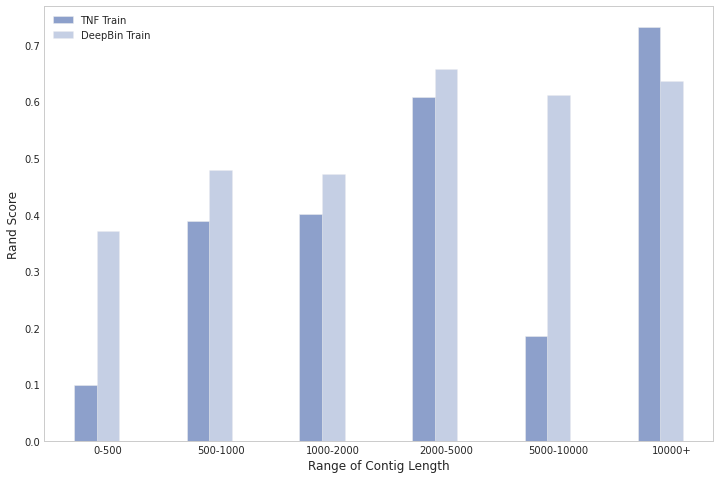

In [323]:
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(12, 8))


plt.style.use('ggplot')

plt.rcParams['font.sans-serif'] = 'Helvetica'


# set height of bar
tnf_train = [tnf_train_values[5], tnf_train_values[4], tnf_train_values[3], tnf_train_values[2], tnf_train_values[1], tnf_train_values[0]]
tnf_val = [tnf_val_values[5], tnf_val_values[4], tnf_val_values[3], tnf_val_values[2], tnf_val_values[1], tnf_val_values[0]]
train_y = [train_rand_values[5], train_rand_values[4], train_rand_values[3], train_rand_values[2], train_rand_values[1], train_rand_values[0]]
val_y = [val_rand_values[5], val_rand_values[4], val_rand_values[3], val_rand_values[2], val_rand_values[1], val_rand_values[0]]
 
# Set position of bar on X axis
br1 = np.arange(len(tnf_train))
br2 = [x + barWidth for x in br1]
#br3 = [x + barWidth for x in br2]
#br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, tnf_train, color =sns.color_palette('Set2')[2], width = barWidth, label ='TNF Train')
plt.bar(br2, train_y, color =sns.color_palette('Set2')[2], alpha =0.5, width = barWidth,label ='DeepBin Train')
#plt.bar(br3, tnf_val, color =sns.color_palette('Set2')[3], width = barWidth, label ='TNF Validation')
#plt.bar(br4, val_y, color =sns.color_palette('Set2')[3], alpha = 0.5, width = barWidth,label ='DeepBin Validation')
 
# Adding Xticks
plt.ylabel("Rand Score")
plt.xlabel("Range of Contig Length")

plt.legend(loc="upper left", prop={'size': 15})

plt.xticks([r + barWidth for r in range(len(tnf_train))],
        ['0-500', '500-1000', '1000-2000', '2000-5000', '5000-10000', '10000+'])
#plt.rcParams['axes.edgecolor']='#333F4B'
#plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
sns.set_style('whitegrid')
plt.grid(False)
plt.legend()
plt.show()

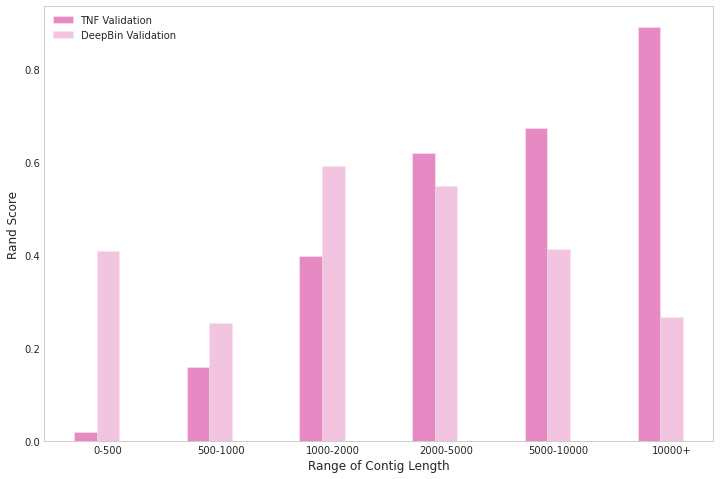

In [324]:
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(12, 8))


plt.style.use('ggplot')

plt.rcParams['font.sans-serif'] = 'Helvetica'


# set height of bar
tnf_train = [tnf_train_values[5], tnf_train_values[4], tnf_train_values[3], tnf_train_values[2], tnf_train_values[1], tnf_train_values[0]]
tnf_val = [tnf_val_values[5], tnf_val_values[4], tnf_val_values[3], tnf_val_values[2], tnf_val_values[1], tnf_val_values[0]]
train_y = [train_rand_values[5], train_rand_values[4], train_rand_values[3], train_rand_values[2], train_rand_values[1], train_rand_values[0]]
val_y = [val_rand_values[5], val_rand_values[4], val_rand_values[3], val_rand_values[2], val_rand_values[1], val_rand_values[0]]
 
# Set position of bar on X axis
br1 = np.arange(len(tnf_train))
br2 = [x + barWidth for x in br1]
#br3 = [x + barWidth for x in br2]
#br4 = [x + barWidth for x in br3]
 
# Make the plot
#plt.bar(br1, tnf_train, color =sns.color_palette('Set2')[2], width = barWidth, label ='TNF Train')
#plt.bar(br2, train_y, color =sns.color_palette('Set2')[2], alpha =0.5, width = barWidth,label ='DeepBin Train')
plt.bar(br1, tnf_val, color =sns.color_palette('Set2')[3], width = barWidth, label ='TNF Validation')
plt.bar(br2, val_y, color =sns.color_palette('Set2')[3], alpha = 0.5, width = barWidth,label ='DeepBin Validation')
 
# Adding Xticks
plt.ylabel("Rand Score")
plt.xlabel("Range of Contig Length")

plt.legend(loc="upper left", prop={'size': 15})

plt.xticks([r + barWidth for r in range(len(tnf_train))],
        ['0-500', '500-1000', '1000-2000', '2000-5000', '5000-10000', '10000+'])
#plt.rcParams['axes.edgecolor']='#333F4B'
#plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
sns.set_style('whitegrid')
plt.grid(False)
plt.legend()
plt.show()